## Setting all dependencies

We are using Pandas to manage all the DF, NLTK to handle all NLP operations, and Codecs to support all the stopwords list manipulation

In [56]:
import pandas as pd
import nltk
import urllib.request
from nltk.corpus import stopwords
import codecs
from nltk.probability import FreqDist
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

## Calling the file

We created a file in our local directory that contains all the scraped articles from 2016 to 2019 from the Hoy Tamaulipas website, and for the analysis we will use the column "content", which stores the complete articles extracted. Each row in the df represents one article

In [2]:
df = pd.read_excel('archive_articles_detail_hoy_tamaulipas.xlsx')
df.head()

,Number,title,sinopsis,content,date
0,0,Localizan casa de seguridad en Reynosa; libera...,Los centroamericanos comentaron que estaban en...,"Reynosa, Tamaulipas. - Elementos de la Policía...",Por: N. G. M. El Día Jueves 24 de Enero del 20...
1,1,Hallan cadáver de un hombre en la brecha 102 d...,El cuerpo estaba boca arriba con visibles huel...,"Reynosa, Tamaulipas. - El cuerpo sin vida de u...",Por: N. G. M. El Día Jueves 24 de Enero del 20...
2,2,Sofocan incendio en basurero de Reynosa,El fuego que amenazaba con propagarse a vivien...,"Reynosa, Tamaulipas.- Un incendio se registró ...",Por: Rosalía Quintá/Reynosa El Día Jueves 24 d...
3,3,Aseguran 2 mil 480 litros de huachicol y dos v...,En dos hechos separados autoridades lograron e...,"Ciudad Victoria, Tamaulipas. – La policía Fede...",Por: HT Agencia El Día Jueves 24 de Enero del ...
4,4,Localizan casa de seguridad en Reynosa; libera...,Los centroamericanos comentaron que estaban en...,"Reynosa, Tamaulipas. - Elementos de la Policía...",Por: N. G. M. El Día Jueves 24 de Enero del 20...


## Preprocess the Text

We first make sure that we are only considering rows that do not contain any empty cell, and then we create a function that can remove all the unwanted punctuation from the column

In [3]:
#Do not consider any empty value in the column
df = df[~df['content'].isnull()]
#Define a funstion to eliminate punctuation
def preprocess(ReviewText):
    ReviewText = ReviewText.str.replace("(<br/>)", "")
    ReviewText = ReviewText.str.replace('(<a).*(>).*(</a>)', '')
    ReviewText = ReviewText.str.replace('(&amp)', '')
    ReviewText = ReviewText.str.replace('(&gt)', '')
    ReviewText = ReviewText.str.replace('(&lt)', '')
    ReviewText = ReviewText.str.replace('(\xa0)', ' ')
    ReviewText = ReviewText.str.replace('(,)', ' ')
    return ReviewText
#Call the function and eliminate punctuation
df['content'] = preprocess(df['content'])

## Tokenizing words

We will now take several steps to clean and organize the data: 
- We will split each sentence into words (tokenize)
- Flatten the list so we have only one large list to analyze
- Remove words that are less than 3 characters and convert everything to lowercase 
- We incorporate the stopwords dictionary and create a custom dictionary that we will store in a file in our local repository so we can remove all the spanish stopwords

In [4]:
#Iterate over the column and split each field into words
tokens=[i.split() for i in df.content]
#Flatten the list and combine all the content in one big list
flat_list = [item for sublist in tokens for item in sublist]
#Remove triple-character tokens (mostly punctuation)
flat_list_short = [word for word in flat_list if len(word) > 3]
#converting the list to lowercase so it can be fed in the models
clean_tokens=[x.lower() for x in flat_list_short]
#set the spanish stopwords using NLTK's and a custom dictionary that we will create
sr = set(nltk.corpus.stopwords.words('spanish'))
#We create a file in our local repository that has all the custom stopwords
stopwords_file = 'spanish_stopwords.txt'
custom_stopwords = set(codecs.open(stopwords_file, 'r', 'ISO-8859-1').read().splitlines())
#Combine the custom file and the NLTK file into one list to be used for the model
all_stopwords = [*sr,*custom_stopwords]
#Iterate over the clean list and remove all the stopwords
tokens_without_stopwords=[token for token in clean_tokens if token not in all_stopwords]

Now that our dataset is clean, we can calculate the frequency of each word, in our case we will take the top 50 most common words in the set, and will print the result 

In [6]:
#Calculate the frequency of each token
freq = nltk.FreqDist(tokens_without_stopwords)
#Iterate over the frequency calculation and print the results
for key,val in freq.most_common(50):
    print(u'{}:{}'.format(key, val))

reynosa:3010
elementos:1404
tamaulipas.-:1351
policía:1209
colonia:1180
unidad:936
ciudad:768
cuerpo:766
autoridades:761
color:687
reynosa.:652
hombre:649
camioneta:597
hechos:592
personas:574
procuraduría:557
tamaulipas.:549
estatal:515
justicia:490
edad:456
llegaron:453
vehículo:451
investigadora:448
vida:441
personal:438
servicio:402
calle:396
médico:385
hospital:385
servicios:383
centro:378
agentes:378
seguridad:376
sitio:375
investigación:364
posteriormente:359
accidente:350
periciales:344
forense:333
protección:330
carretera:325
civil:325
interior:324
robo:319
altura:317
persona:313
registró:313
armados:280
reporte:278
oficiales:278


Using the results in the previous step, we will use now the plot method in NLTK to create a chart that will display the top 50 mos common words so we can visualize the results

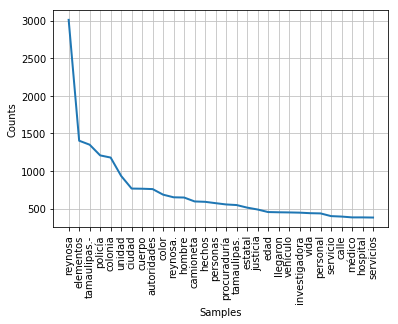

In [8]:
#Plot the results
freq.plot(30, cumulative=False)

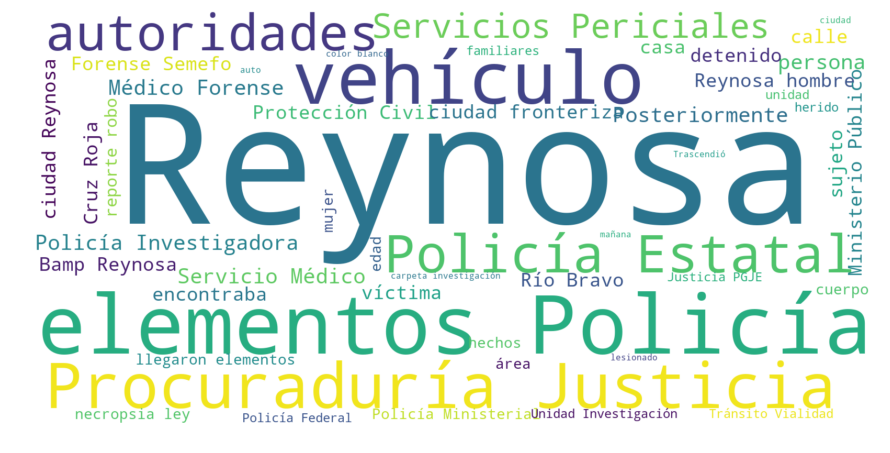

In [29]:
#join all content into one big bag of words
text = " ".join(review for review in df.content)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=all_stopwords, scale=4, relative_scaling=0.5, max_font_size=80, max_words=50,background_color="white").generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize = (15, 15), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Text Similarity

## Entity Recognition